In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_excel('kayseri_kaza_verileri.xlsx')

In [38]:
# info() her sütundaki kayıt sayısı, boş veya boş olmayan veriler, Veri türü,
# veri kümesinin bellek kullanımı dahil olmak üzere veri türünü ve verilerle ilgili bilgileri anlamaya yardımcı olur
print(data.head())

                X               Y        X.1        Y.1   KAZA TURU  \
0  35508782834207  38707161168583  38.707161  35.508783  Yaralamali   
1  35434624154945  38735652082362  38.735652  35.434624  Yaralamali   
2  35529938002123  38733578034397  38.733578  35.529938  Yaralamali   
3  35551174358534  38677216094917  38.677216  35.551174  Yaralamali   
4  35458740002115  38689680085274  38.689680  35.458740  Yaralamali   

   KGM ciddiyet seviyesi  Kaza Ciddiyet Seviyesi  AY MEVSİM  KAZA SAAT  ...  \
0                      1                       1   1    kis        1.0  ...   
1                      1                       1   1    kis        1.0  ...   
2                      1                       1   1    kis        1.0  ...   
3                      1                       1   1    kis        1.0  ...   
4                      1                       1   1    kis        1.0  ...   

  AYDINLATMA  Unnamed: 21 Yasal Hız Limit  ARAC CINSI  ARAC MODELI  \
0        Var            1   

In [16]:
# nunique() her sütundaki birkaç benzersiz değere ve veri açıklamasına dayanarak , verilerdeki sürekli ve kategorik sütunları tanımlayabiliriz.
# Tekrarlanan veriler daha fazla analize dayalı olarak işlenebilir veya kaldırılabilir
print(data.iloc[:, 4:].nunique())

KAZA TURU                    2
KGM ciddiyet seviyesi       28
Kaza Ciddiyet Seviyesi       6
AY                          12
MEVSİM                       4
KAZA SAAT                   26
MAHALLE                    119
MAHALLE yoğunluğu            4
YOL                       1583
OLU SAYISI                   7
YARALI SAYISI               25
TASIT SAYISI                11
SURUCU KUSURU               79
OLUS NEDENI                 15
KAPLAMA CINSI                6
SERIT SAYISI                12
AYDINLATMA                   3
Unnamed: 21                  4
Yasal Hız Limit             12
ARAC CINSI                  19
ARAC MODELI                 56
SURUCU CINSIYET              3
SURUCU EGITIM DURUMU        12
EHLIYET YILI                62
dtype: int64


In [18]:
# isnull(), verilerdeki boş değerleri tanımlamak için tüm ön işleme adımlarında yaygın olarak kullanılmaktadır
# data.isnull().sum() her sütundaki eksik kayıtların sayısını bulmak için kullanılır
#print(data.isnull().sum())

In [20]:
# Aşağıdaki kod, her sütundaki eksik değerlerin yüzdesini hesaplamaya yardımcı olur
#print((data.isnull().sum()/(len(data)))*100)

In [59]:
# Remove OLU SAYISI column from data
#data = data.drop(['OLU SAYISI'], axis = 1)
#print(data.info())

In [60]:
# Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors,
# and some variables may need data type conversion. We need to fix this issue in the data.
#print(data.AY.unique())
#print(data.AY.nunique())

In [56]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['KAZA TURU', 'MEVSİM', 'MAHALLE', 'YOL', 'SURUCU KUSURU', 'OLUS NEDENI',
       'KAPLAMA CINSI', 'AYDINLATMA', 'Yasal Hız Limit', 'ARAC CINSI',
       'SURUCU CINSIYET', 'SURUCU EGITIM DURUMU'],
      dtype='object')
Numerical Variables:
['X', 'Y', 'X.1', 'Y.1', 'KGM ciddiyet seviyesi', 'Kaza Ciddiyet Seviyesi', 'AY', 'KAZA SAAT', 'MAHALLE yoğunluğu', 'OLU SAYISI', 'YARALI SAYISI', 'TASIT SAYISI', 'SERIT SAYISI', 'Unnamed: 21', 'ARAC MODELI', 'EHLIYET YILI', 'DENEYİM']


In [54]:
# Negatif değerleri filtrele
data = data[data['EHLIYET YILI'] >= 0]

# Bugünün yılını al
current_year = date.today().year

# DENEYİM sütununu hesapla (Ehliyet Yılı'ndan)
data['DENEYİM'] = current_year - data['EHLIYET YILI']

# Sadece DENEYİM sütununu yazdır
print(data['DENEYİM'])


0        2023
1        2022
2        2020
3        2020
4        2021
         ... 
15184    2012
15185    2020
15186    2019
15187    2018
15188    2015
Name: DENEYİM, Length: 15125, dtype: int64


YARALI SAYISI
Skew: 6.67


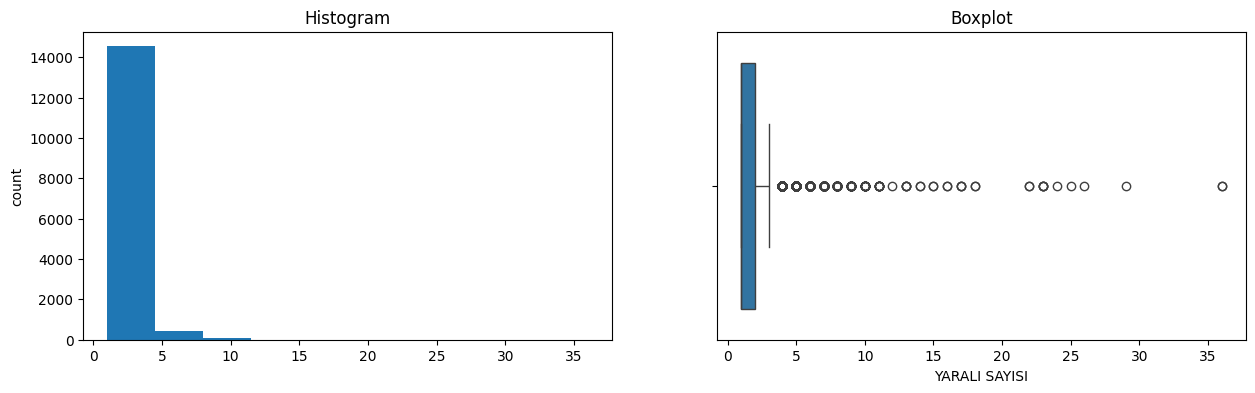

MAHALLE yoğunluğu
Skew: 0.27


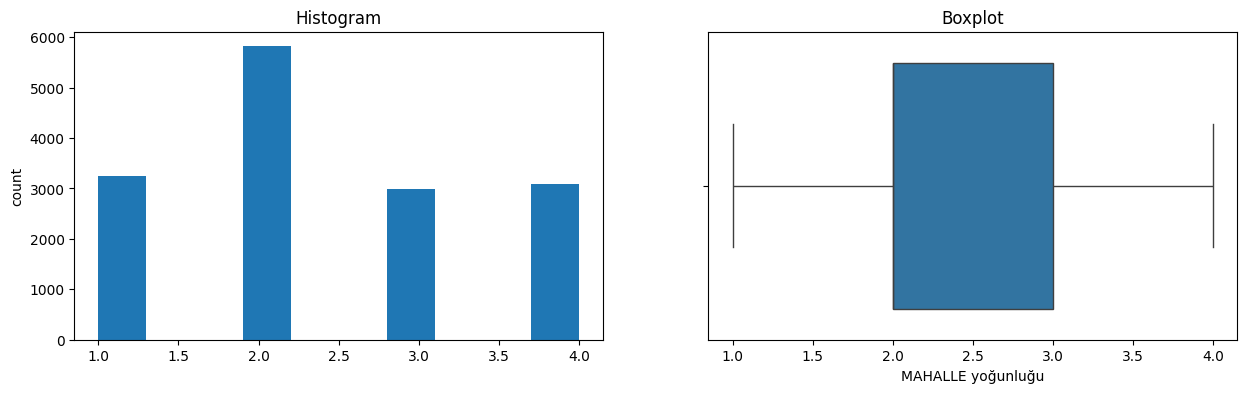

SURUCU EGITIM DURUMU
EHLIYET YILI
Skew: 0.96


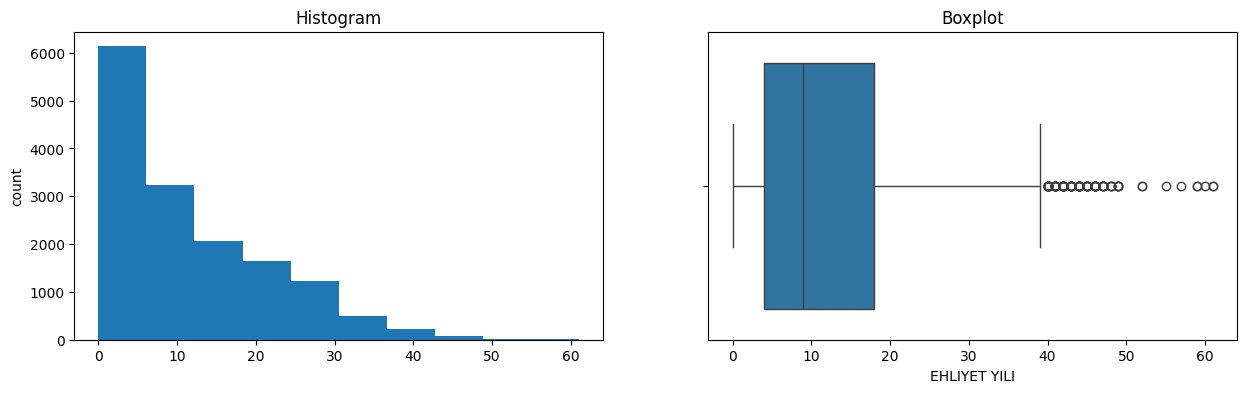

DENEYİM
Skew: -0.96


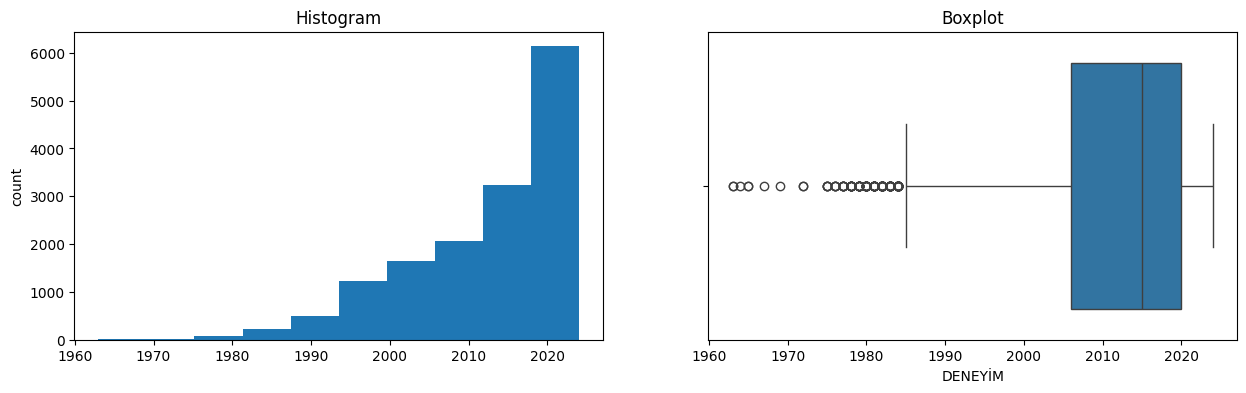

In [58]:
# İlgili sütunları seç
selected_cols = ['YARALI SAYISI', 'MAHALLE yoğunluğu', 'SURUCU EGITIM DURUMU', 'EHLIYET YILI', 'DENEYİM']

# Seçilen sütunlar için tek değişkenli analiz yap
for col in selected_cols:
    print(col)
    if data[col].dtype != 'O':  # Sadece sayısal sütunları işle
        print('Skew:', round(data[col].skew(), 2))
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        data[col].hist(grid=False)
        plt.ylabel('count')
        plt.title('Histogram')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col])
        plt.title('Boxplot')
        plt.show()


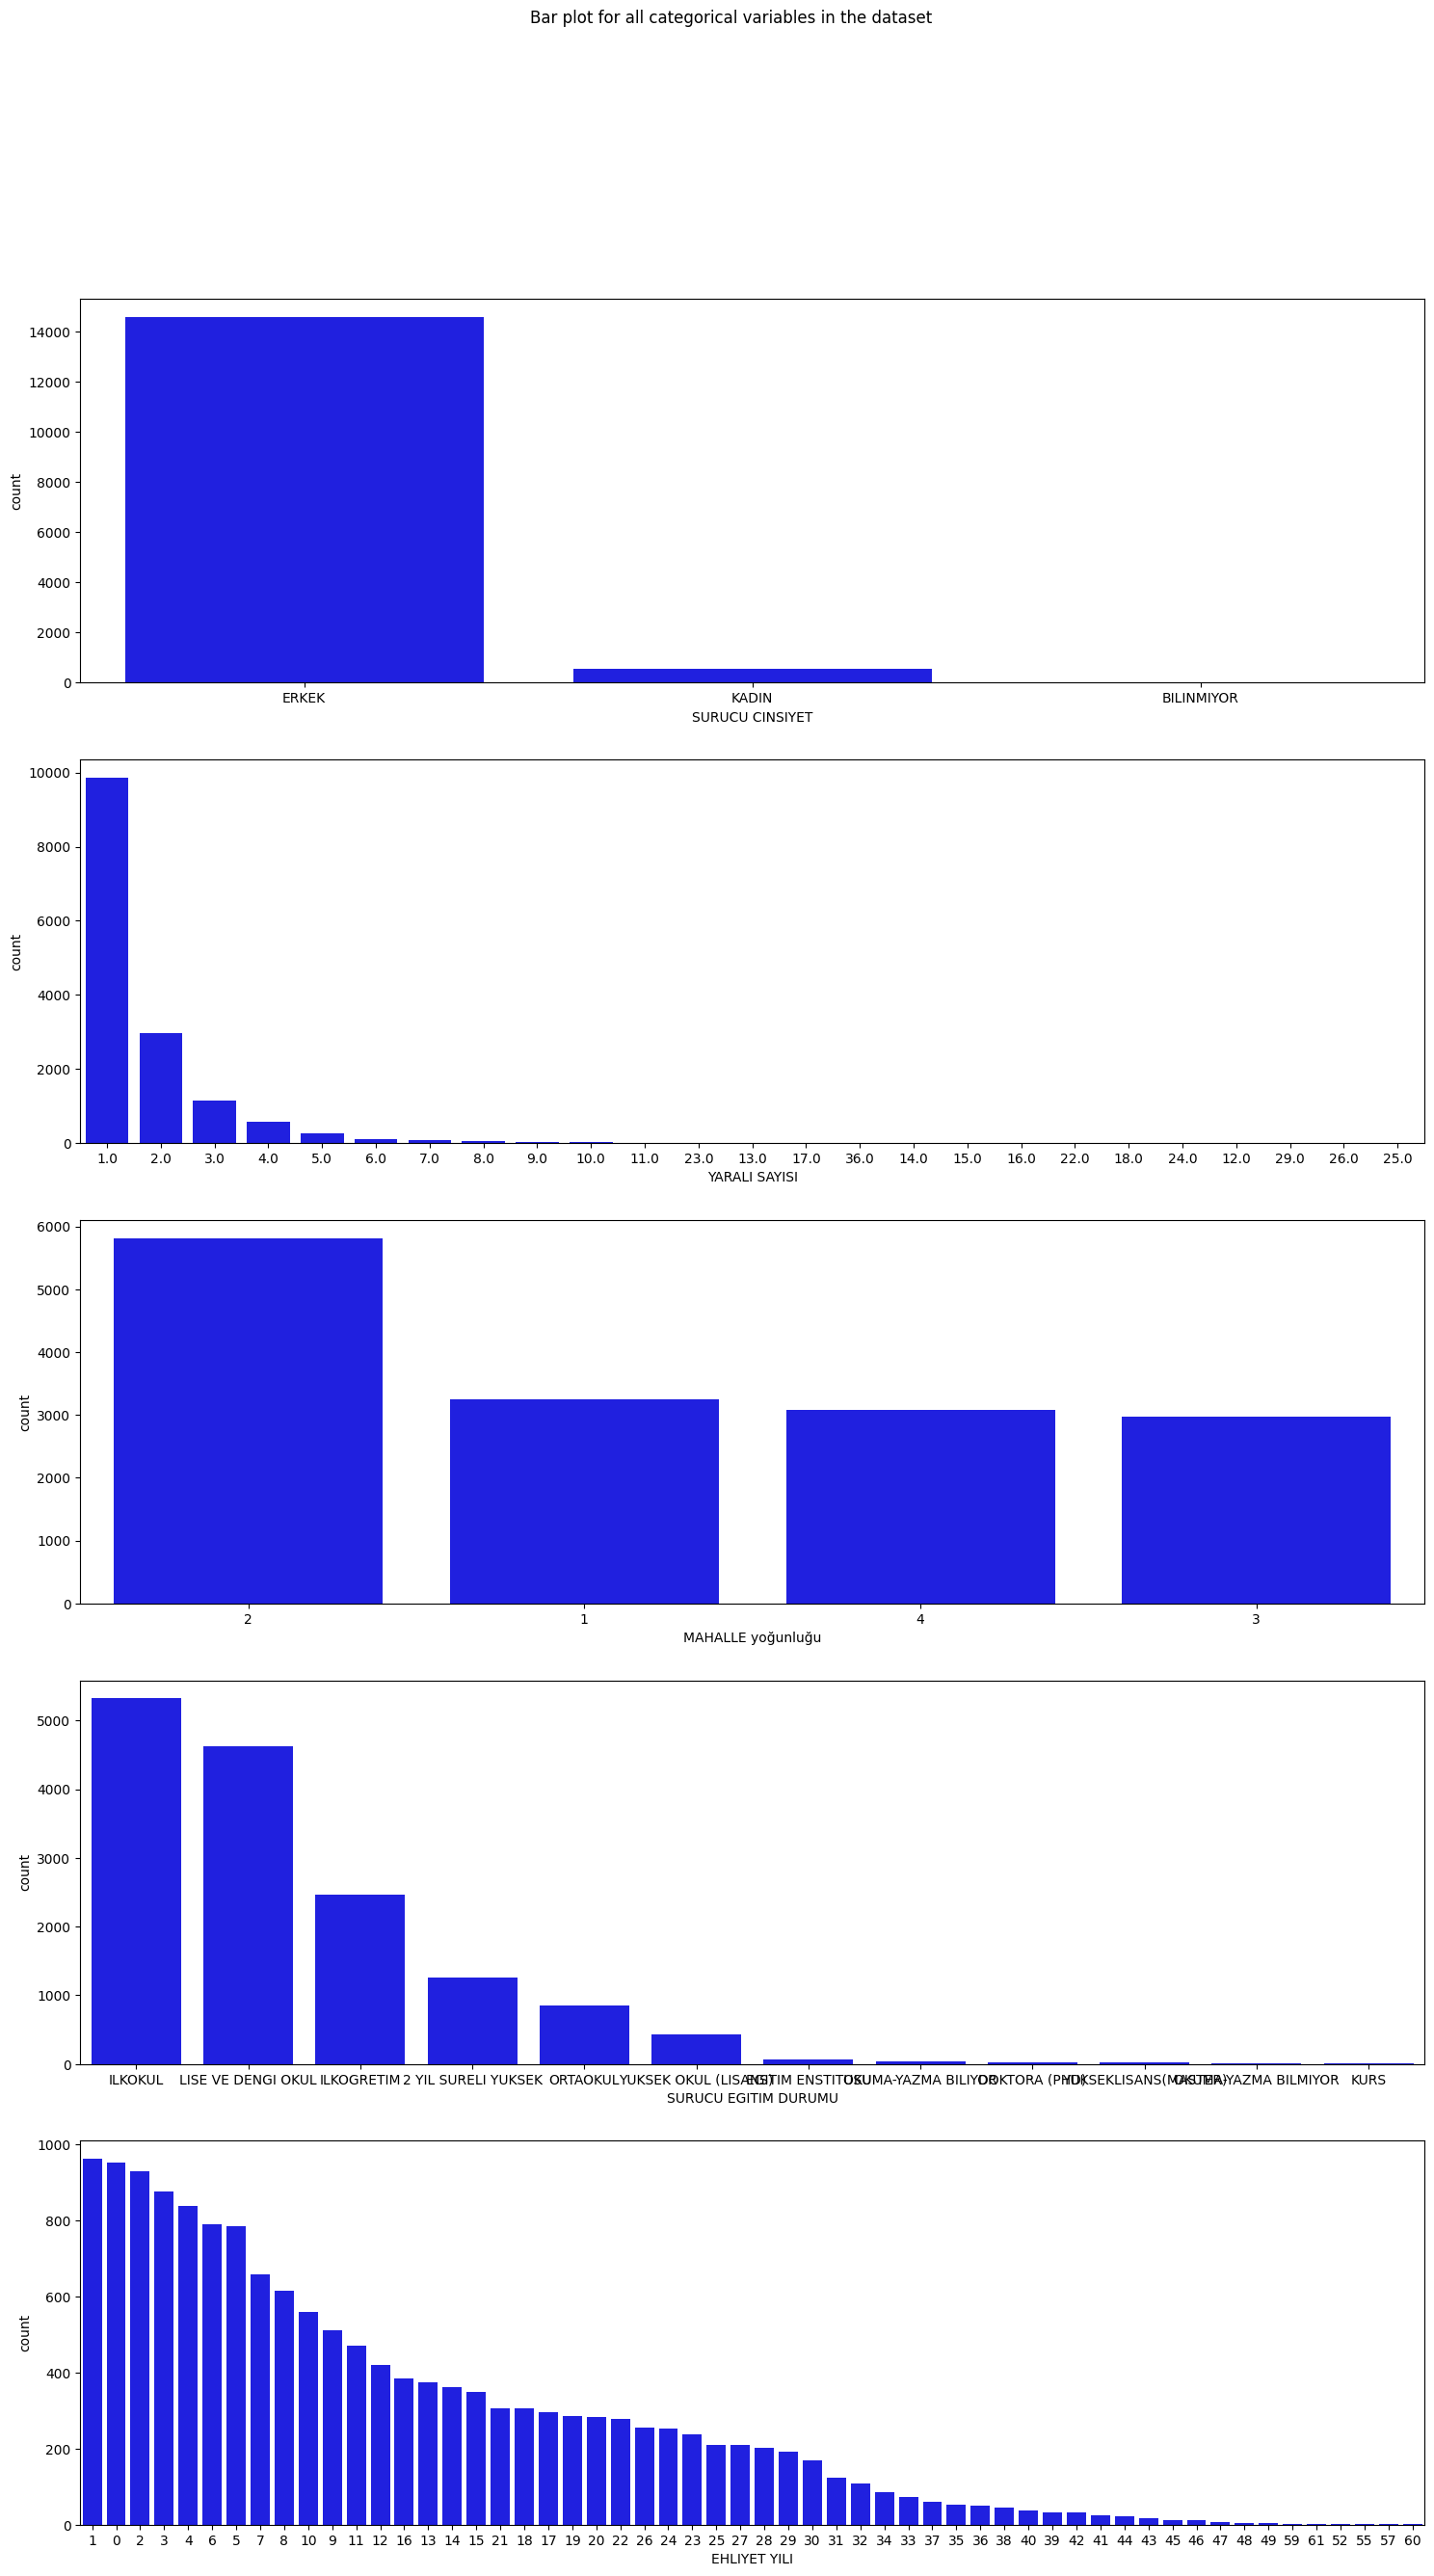

In [64]:
# İlgili sütunları seç
selected_cols = ['SURUCU CINSIYET', 'YARALI SAYISI', 'MAHALLE yoğunluğu', 'SURUCU EGITIM DURUMU', 'EHLIYET YILI']

# Tekrarlanan sütunları kaldır
selected_cols = [col for col in selected_cols if data[col].nunique() > 2]

# Grafikleri yeniden çiz
fig, axes = plt.subplots(len(selected_cols), 1, figsize=(18, len(selected_cols) * 6))
fig.suptitle('Bar plot for all categorical variables in the dataset')

for i, col in enumerate(selected_cols):
    sns.countplot(ax=axes[i], x=col, data=data, color='blue', order=data[col].value_counts().index)

plt.show()


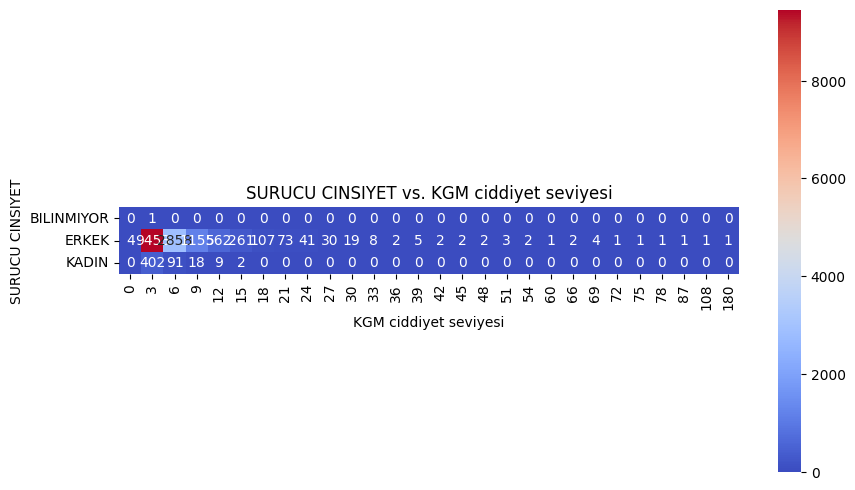

In [66]:
# Kategorik değişkenlerin çapraz tablosunu oluştur
cross_table = pd.crosstab(data['SURUCU CINSIYET'], data['KGM ciddiyet seviyesi'])

# Isı haritası oluştur
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='coolwarm', cbar=True, square=True)
plt.title('SURUCU CINSIYET vs. KGM ciddiyet seviyesi')
plt.xlabel('KGM ciddiyet seviyesi')
plt.ylabel('SURUCU CINSIYET')
plt.show()


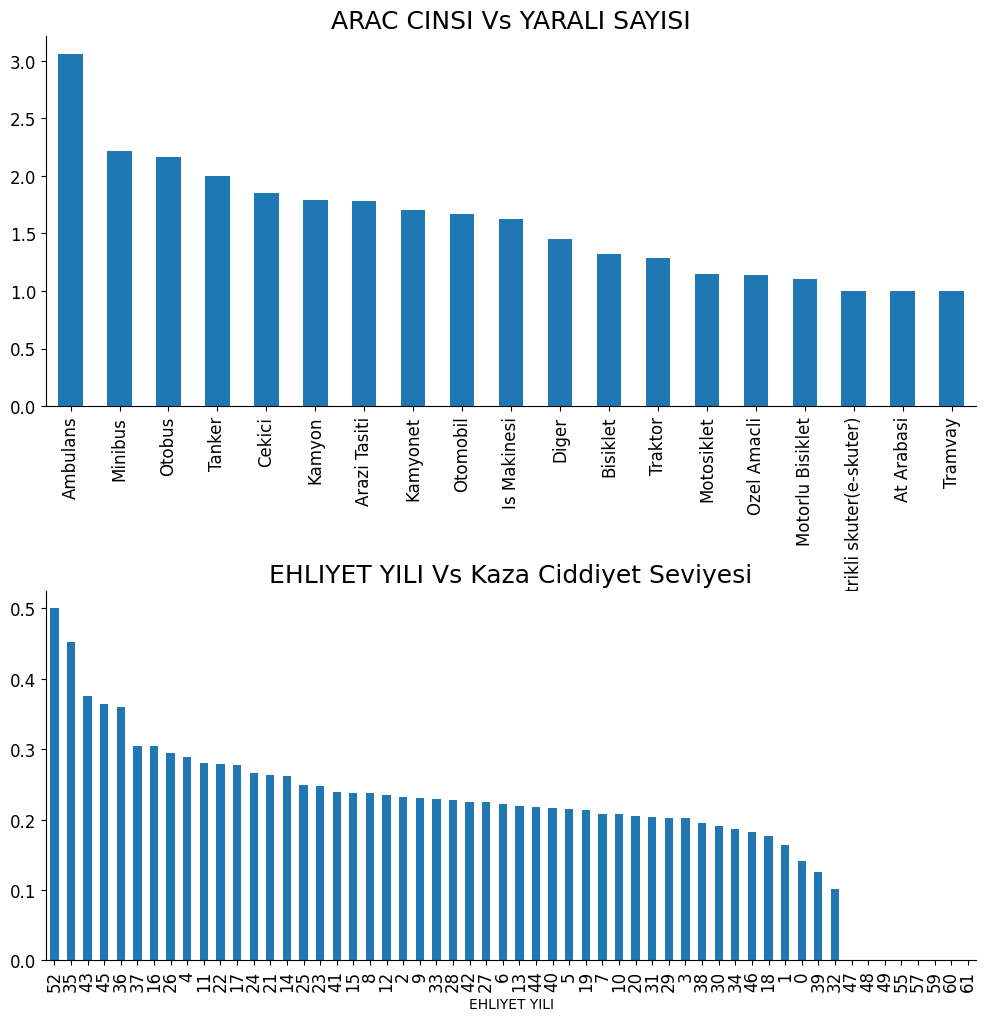

In [67]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 12))

# ARAC CINSI ve YARALI SAYISI analizi
data.groupby('ARAC CINSI')['YARALI SAYISI'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12)
axarr[0].set_title("ARAC CINSI Vs YARALI SAYISI", fontsize=18)

# EHLIYET YILI ve Kaza Ciddiyet Seviyesi analizi
data.groupby('EHLIYET YILI')['Kaza Ciddiyet Seviyesi'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12)
axarr[1].set_title("EHLIYET YILI Vs Kaza Ciddiyet Seviyesi", fontsize=18)

plt.subplots_adjust(hspace=0.5)
sns.despine()
plt.show()


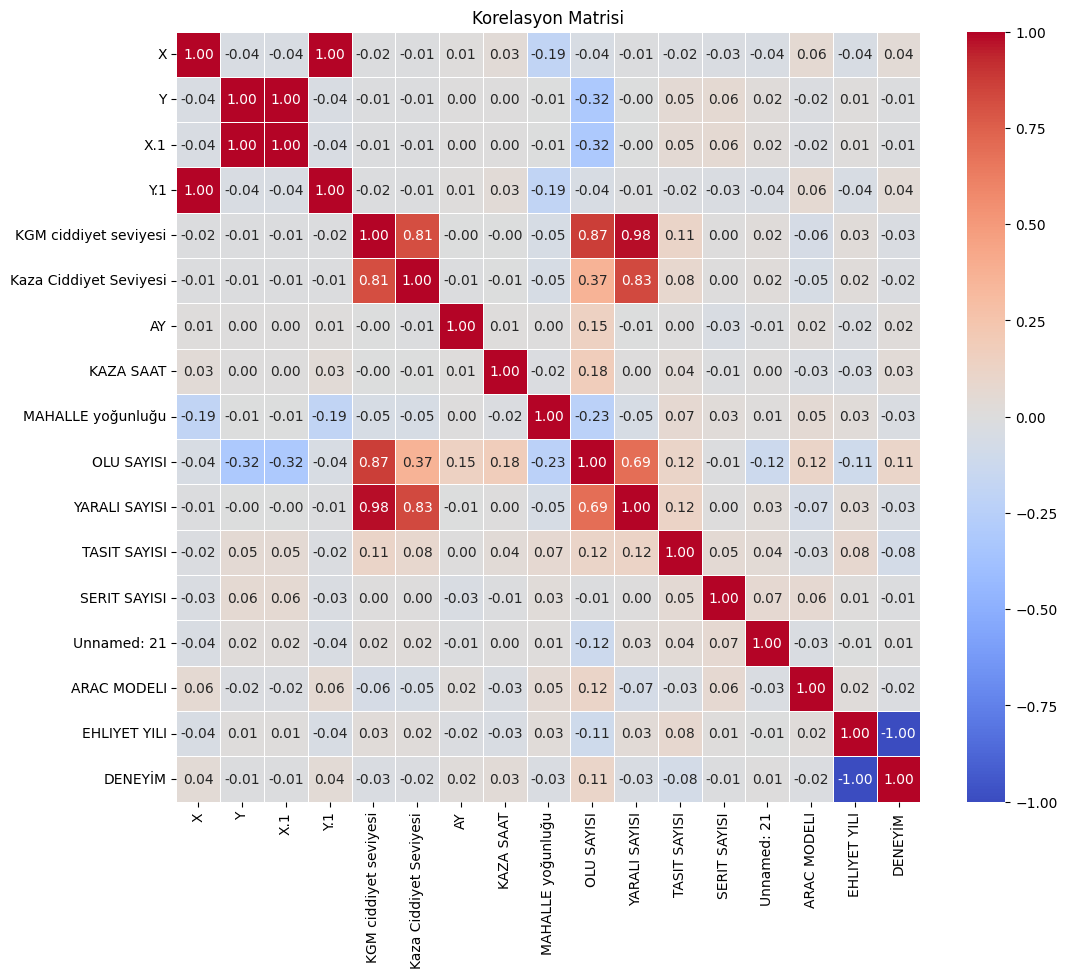

In [70]:
# Yalnızca sayısal sütunları seç
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini oluştur
correlation_matrix = numeric_data.corr()

# Korelasyon matrisinin ısı haritasını oluştur
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()